# D.C. Residential Properties Dataset Analysis
### Team: Big Daddy Data

**Data Source**:

Dataset was downloaded from https://www.kaggle.com/christophercorrea/dc-residential-properties

**Introduction**


Dataset ready for analysis showing real property information, including most recent sales price as of July 2018, for properties located Washington, D.C.

The source of the data is Open Data DC{1}, and the dataset utilized here, DC_Property_data.csv, was created by merging three OpenData.DC.gov source files: raw_residential_data.csv; raw_condominium_data.csv; & raw_address_points.csv.{2}

{1} https://opendata.dc.gov/ {2} https://www.kaggle.com/christophercorrea/preparing-the-d-c-real-property-dataset

**Columns in this Dataset**

|Column Name|Description|Type|
|--|--|--|
|ID|ID#|Int|
|BATHRM|Number of Full Bathrooms|Int|
|HF_BATHRM|Number of Half Bathrooms (no bathtub or shower)|Int|
|HEAT|Heating|String|
|AC|Cooling|String|
|NUM_UNITS|Number of Units|Int|
|ROOMS|Number of Rooms|Int|
|AYB|The earliest time the main portion of the building was built|Int|
|YR_RMDL|Year structure was remodeled|Int|
|EYB|The year an improvement was built more recent than actual year built|Int|
|STORIES|Number of stories in primary dwelling|Int|
|SALEDATE|Date of most recent sale|Timestamp|
|PRICE|Price of most recent sale|Int|
|QUALIFIED|Qualified|Boolean|
|SALE_NUM|Sale Number|Int|
|GBA|Gross building area in square feet|Int|
|BLDG_NUM|Building Number on Property|Int|
|STYLE|Style|String|
|STRUCT|Structure|String|
|GRADE|Grade|String|
|CNDTN|Condition|String|
|EXTWALL|Extrerior wall|String|
|ROOF|Roof type|String|
|INTWALL|Interior wall|String|
|KITCHENS|Number of kitchens|Int|
|FIREPLACES|Number of fireplaces|Int|
|USECODE|Property use code|Int|
|LANDAREA|Land area of property in square feet|Int|
|GIS_LAST_MOD_DTTM|Last Modified Date|Timestamp|
|SOURCE|Raw Data Source|String|
|CMPLX_NUM|Complex number|String|
|LIVING_GBA|Gross building area in square feet|String|
|FULLADDRESS|Full Street Address|String|
|CITY|City|String|
|STATE|State|String|
|ZIPCODE|Zip Code|Int|
|NATIONALGRID|Address location national grid coordinate spatial address|String|
|LATITUDE|Latitude|Int|
|LONGITUDE|Longitude|Int|
|ASSESSMENT_NBHD|Neighborhood ID|String|
|ASSESSMENT_SUBNBHD|Subneighborhood ID|String|
|CENSUS_TRACT|Census tract|Int|
|CENSUS_BLOCK|Census block|String|
|WARD|Ward (District is divided into eight wards, each with approximately 75,000 residents)|String|
|SQUARE|Square (from SSL)|Int|
|X|longitude|Int|
|Y|latitude|Int|
|QUADRANT|City quadrant (NE,SE,SW,NW)|String|

## Questions one could ask and find answers to from this dataset:
* Is there a model to predict the sale price of residental properties in D.C?
* What's the most relevant parameters to build up the model?
* Which area has the most expensive and which area has the least properties price?
* What's the properties sales trend in the last ten years?
* What's the best time of the year to sell a property?
* Create a graphic map using longtitude and latitude to indicate the sales of different area.

### Datasource

In [4]:
data = "gs://is843_erli/notebooks/data/"

### Loading the data into a Spark DataFrame
Verify the datasource:

In [5]:
!gsutil ls {data + "DC_Properties.csv"}

gs://is843_erli/notebooks/data/DC_Properties.csv


Create dataframe by using inferred schema:

In [6]:
df = spark.read.format("csv")\
  .option("header", "true")\
  .option("inferSchema", "true")\
  .load(data + "DC_Properties.csv")

df.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- BATHRM: integer (nullable = true)
 |-- HF_BATHRM: integer (nullable = true)
 |-- HEAT: string (nullable = true)
 |-- AC: string (nullable = true)
 |-- NUM_UNITS: double (nullable = true)
 |-- ROOMS: integer (nullable = true)
 |-- BEDRM: integer (nullable = true)
 |-- AYB: double (nullable = true)
 |-- YR_RMDL: double (nullable = true)
 |-- EYB: integer (nullable = true)
 |-- STORIES: double (nullable = true)
 |-- SALEDATE: timestamp (nullable = true)
 |-- PRICE: double (nullable = true)
 |-- QUALIFIED: string (nullable = true)
 |-- SALE_NUM: integer (nullable = true)
 |-- GBA: double (nullable = true)
 |-- BLDG_NUM: integer (nullable = true)
 |-- STYLE: string (nullable = true)
 |-- STRUCT: string (nullable = true)
 |-- GRADE: string (nullable = true)
 |-- CNDTN: string (nullable = true)
 |-- EXTWALL: string (nullable = true)
 |-- ROOF: string (nullable = true)
 |-- INTWALL: string (nullable = true)
 |-- KITCHENS: double (nullable = true)
 |

Show first 5 rows of the dataset:

In [7]:
df.show(5, False)

+---+------+---------+-------------+---+---------+-----+-----+------+-------+----+-------+-------------------+---------+---------+--------+------+--------+-------+-------------+---------+---------+------------+----------+--------+--------+----------+-------+--------+-------------------+-----------+---------+----------+----------------------------+----------+-----+-------+------------------+-----------+------------+---------------+------------------+------------+------------+------+------+------------------+------------------+---------+
|ID |BATHRM|HF_BATHRM|HEAT         |AC |NUM_UNITS|ROOMS|BEDRM|AYB   |YR_RMDL|EYB |STORIES|SALEDATE           |PRICE    |QUALIFIED|SALE_NUM|GBA   |BLDG_NUM|STYLE  |STRUCT       |GRADE    |CNDTN    |EXTWALL     |ROOF      |INTWALL |KITCHENS|FIREPLACES|USECODE|LANDAREA|GIS_LAST_MOD_DTTM  |SOURCE     |CMPLX_NUM|LIVING_GBA|FULLADDRESS                 |CITY      |STATE|ZIPCODE|NATIONALGRID      |LATITUDE   |LONGITUDE   |ASSESSMENT_NBHD|ASSESSMENT_SUBNBHD|CENSU

## Data Proofiling

#### Caching and partitioning the Dataframe

In [8]:
#per 01-EDA.ipynb:
df = df.repartition(20)
print("data was re-partitioned to {} partitions!".format(df.rdd.getNumPartitions()))

spark.conf.set("spark.sql.shuffle.partitions", "20")

df.cache()

data was re-partitioned to 20 partitions!


DataFrame[ID: int, BATHRM: int, HF_BATHRM: int, HEAT: string, AC: string, NUM_UNITS: double, ROOMS: int, BEDRM: int, AYB: double, YR_RMDL: double, EYB: int, STORIES: double, SALEDATE: timestamp, PRICE: double, QUALIFIED: string, SALE_NUM: int, GBA: double, BLDG_NUM: int, STYLE: string, STRUCT: string, GRADE: string, CNDTN: string, EXTWALL: string, ROOF: string, INTWALL: string, KITCHENS: double, FIREPLACES: int, USECODE: int, LANDAREA: int, GIS_LAST_MOD_DTTM: timestamp, SOURCE: string, CMPLX_NUM: double, LIVING_GBA: double, FULLADDRESS: string, CITY: string, STATE: string, ZIPCODE: double, NATIONALGRID: string, LATITUDE: double, LONGITUDE: double, ASSESSMENT_NBHD: string, ASSESSMENT_SUBNBHD: string, CENSUS_TRACT: double, CENSUS_BLOCK: string, WARD: string, SQUARE: string, X: double, Y: double, QUADRANTå: string]

Number of rows in data set

In [9]:
print(" The DC DataFrame has {} records".format(df.count()))

 The DC DataFrame has 158957 records


#### Dropping columns that we will not be using in our analysis

In [10]:
df = df.drop('CITY', 'STATE')

#### Dropping duplicates

In [11]:
df = df.drop_duplicates()

In [12]:
df.count()

158957

No duplicates!

#### Summary of the column PRICE and ROOMS using describe()

In [14]:
df.describe(['PRICE','ROOMS']).show()

+-------+-----------------+------------------+
|summary|            PRICE|             ROOMS|
+-------+-----------------+------------------+
|  count|            98216|            158957|
|   mean|931351.5949336156| 6.187736306045031|
| stddev|7061324.955611985|2.6181648762975898|
|    min|              1.0|                 0|
|    max|     1.37427545E8|                48|
+-------+-----------------+------------------+



#### Average price grouped by rooms?

In [15]:
df.groupBy("ROOMS").avg("PRICE").orderBy("ROOMS").show()

+-----+------------------+
|ROOMS|        avg(PRICE)|
+-----+------------------+
|    0| 1088490.148148148|
|    1|      224517.90625|
|    2|1949664.9899691357|
|    3| 2217071.020540075|
|    4| 909270.1605109167|
|    5| 526515.8907682132|
|    6|442921.58700986527|
|    7|514975.68252080854|
|    8| 638748.8952567024|
|    9|  789671.449940547|
|   10| 915297.1920289855|
|   11|1133502.3383233533|
|   12| 901382.7240223463|
|   13|1669379.7375886524|
|   14|1434225.8025477708|
|   15| 1933945.594117647|
|   16| 590948.4454203262|
|   17|2928117.6470588236|
|   18|1504978.3333333333|
|   19|3248112.3529411764|
+-----+------------------+
only showing top 20 rows



#### Date range of house

In [16]:
df.selectExpr("min(EYB)", "max(EYB)").show()

+--------+--------+
|min(EYB)|max(EYB)|
+--------+--------+
|    1800|    2018|
+--------+--------+



#### Average price grouped by LAND AREA?

In [17]:
df.groupBy("LANDAREA").avg("PRICE").orderBy("LANDAREA").show()

+--------+------------------+
|LANDAREA|        avg(PRICE)|
+--------+------------------+
|       0| 763316.4838709678|
|       1|          463500.0|
|       2|          635000.0|
|       3|          321350.0|
|       4| 274342.2727272727|
|       5|143411.76923076922|
|       6| 264408.0740740741|
|       7| 359277.1551724138|
|       8| 442579.9756097561|
|       9| 484940.5104166667|
|      10| 451753.8333333333|
|      11| 509545.0326086957|
|      12| 734490.4761904762|
|      13| 718138.0303030303|
|      14| 663660.1224489796|
|      15|          813650.0|
|      16|          949000.0|
|      17|         1156237.5|
|      18|         665996.25|
|      19| 650742.1052631579|
+--------+------------------+
only showing top 20 rows



#### Average price grouped by Source of house and Condition?

In [18]:
df.groupBy("SOURCE","CNDTN").avg("PRICE").show()

+-----------+---------+------------------+
|     SOURCE|    CNDTN|        avg(PRICE)|
+-----------+---------+------------------+
|Condominium|     null| 1436073.252554817|
|Residential|     Good| 655149.2966045662|
|Residential|  Default|         8518500.0|
|Residential|     Poor|474262.63440860214|
|Residential|Very Good| 945584.9956593325|
|Residential|     Fair|409360.44007858547|
|Residential|Excellent|1247995.2002249719|
|Residential|  Average|  375583.619497772|
+-----------+---------+------------------+



#### Average price grouped by Quadrant of house location in washington DC city?

In [19]:
df.groupBy("QUADRANTå").avg("PRICE").show()

+---------+------------------+
|QUADRANTå|        avg(PRICE)|
+---------+------------------+
|     null| 454064.9405940594|
|       NE| 392871.5477633875|
|       SE|368226.04414454184|
|       NW|1317785.1587480297|
|       SW| 347048.9480189022|
+---------+------------------+



#### How many house types are there based on Structure?

In [20]:
df.select("STRUCT").distinct().count()

10

In [21]:
df.groupBy("STRUCT", "STYLE").count().orderBy("STYLE").show()

+-------------+---------------+-----+
|       STRUCT|          STYLE|count|
+-------------+---------------+-----+
|         null|           null|52261|
|Semi-Detached|        1 Story|  124|
|   Row Inside|        1 Story|   68|
|       Single|        1 Story| 4172|
|      Row End|        1 Story|   23|
|      Default|        1 Story|    3|
|        Multi|        1 Story|   30|
|Semi-Detached|  1.5 Story Fin|  102|
|       Single|  1.5 Story Fin| 2510|
|   Row Inside|  1.5 Story Fin|   27|
|      Row End|  1.5 Story Fin|   10|
|  Town Inside|  1.5 Story Fin|    1|
|        Multi|  1.5 Story Fin|    5|
|       Single|1.5 Story Unfin|   98|
|      Row End|1.5 Story Unfin|    2|
|   Row Inside|1.5 Story Unfin|    2|
|        Multi|1.5 Story Unfin|    4|
|Semi-Detached|1.5 Story Unfin|    6|
|       Single|        2 Story|17838|
|     Town End|        2 Story|   64|
+-------------+---------------+-----+
only showing top 20 rows



#### Comparison of house price based on year and strcuture type

In [22]:
df.where("EYB > 1980").groupBy("STRUCT").avg("PRICE").show()

+-------------+------------------+
|       STRUCT|        avg(PRICE)|
+-------------+------------------+
|  Town Inside|392982.09826589597|
|         null|3008956.1140142516|
|Semi-Detached| 714739.0310932798|
|        Multi| 812050.9470198676|
|      Row End| 780592.3756530825|
|  Vacant Land|              null|
|   Row Inside| 770320.1216355044|
|      Default|         8158125.0|
|     Town End|470861.85714285716|
|       Single|1369162.2557859933|
+-------------+------------------+



In [23]:
df.where("EYB < 1980").groupBy("STRUCT").avg("PRICE").show()

+-------------+------------------+
|       STRUCT|        avg(PRICE)|
+-------------+------------------+
|  Town Inside|          456176.0|
|         null| 650015.6415482494|
|        Multi| 374835.5344763325|
|Semi-Detached| 341055.4788614483|
|      Row End|486290.09292846953|
|  Vacant Land|              null|
|   Row Inside| 498344.3656085237|
|      Default|3066666.6666666665|
|     Town End| 362978.3333333333|
|       Single| 581718.7924424972|
+-------------+------------------+



## Visualization

#### Installing Panda

In [24]:
!conda install pandas

Solving environment: done

## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - pandas


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    pandas-0.24.2              |   py36he6710b0_0        11.1 MB
    ------------------------------------------------------------
                                           Total:        11.1 MB

The following NEW packages will be INSTALLED:

  pandas             pkgs/main/linux-64::pandas-0.24.2-py36he6710b0_0



pandas-0.24.2        | 11.1 MB   | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


### Find the trends for property sales by year. 

#### analysis the total sales count, average price and totoal sales value by each year. (Exclude 2007 and 2015 which contains invalid data)

In [25]:
from pyspark.sql import functions as F
#exclude 2007 and 2015 data since they are outliers
sales_for_each_year = df.groupBy(F.year("SALEDATE").alias("Year"))\
                        .agg(F.count("ID").alias("sales_count"),F.avg("PRICE").alias("avg_price"), F.sum("PRICE").alias("total_sales_amount"))\
                        .where(F.col("Year") >= 2000)\
                        .where(F.col("Year") <= 2017)\
                        .where(F.col("Year") != 2007 )\
                        .where(F.col("Year") != 2015 )\
                        .orderBy(F.desc("Year"))
sales_for_each_year.show()

+----+-----------+------------------+------------------+
|Year|sales_count|         avg_price|total_sales_amount|
+----+-----------+------------------+------------------+
|2017|      12399| 754478.6438944569|      7.37729218E9|
|2016|      10491| 648541.7989875294|      5.25254003E9|
|2014|       8635| 635945.9630867386|     4.186432275E9|
|2013|       8136| 602606.5104651162|     3.627691193E9|
|2012|       6593| 554010.0291909925|       2.6570321E9|
|2011|       5658| 532311.8999751799|     2.144684645E9|
|2010|       5505| 561583.3860622137|     2.328886302E9|
|2009|       5166| 482791.6462904911|     1.848126422E9|
|2008|       4772|512125.38417910447|     1.715620037E9|
|2006|       5263|487862.33897856576|     1.843631779E9|
|2005|       5882|498257.22329411766|     2.117593199E9|
|2004|       4949| 403180.0269975457|     1.478461159E9|
|2003|       4316|357727.10807204805|      1.07246587E9|
|2002|       3460|  304200.144036009|      8.10997584E8|
|2001|       3075|277366.512458

In [26]:
py_dc_data = sales_for_each_year.toPandas()
py_dc_data.head()

,Year,sales_count,avg_price,total_sales_amount
0,2017,12399,754478.643894,7.377292e+09
1,2016,10491,648541.798988,5.252540e+09
2,2014,8635,635945.963087,4.186432e+09
3,2013,8136,602606.510465,3.627691e+09
4,2012,6593,554010.029191,2.657032e+09


#### Use *matplotlib* for plotting

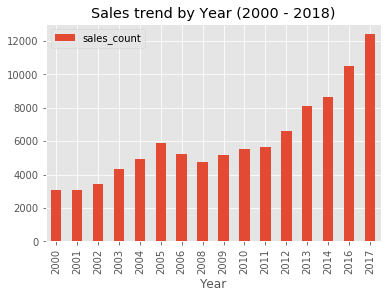

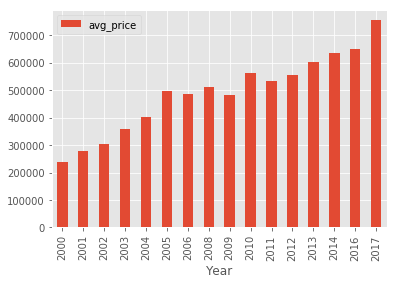

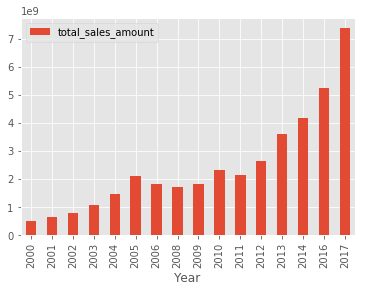

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
df1 = py_dc_data.set_index('Year')
df1[["sales_count" ]].plot.bar().invert_xaxis()
plt.title('Sales trend by Year (2000 - 2018)')
df1[["avg_price" ]].plot.bar().invert_xaxis()
df1[["total_sales_amount" ]].plot.bar().invert_xaxis()

In [28]:
sales_for_each_month = df.groupBy(F.month("SALEDATE").alias("Month"))\
                        .agg(F.count("ID").alias("sales_count"),F.avg("PRICE").alias("avg_price"))\
                        .where(F.col("Month") <= 12)\
                        .where(F.col("Month") >= 1)\
                        .orderBy(F.asc("Month"))
sales_for_each_month.show()

+-----+-----------+------------------+
|Month|sales_count|         avg_price|
+-----+-----------+------------------+
|    1|       9789|506034.52698781196|
|    2|       8394|496008.98143146525|
|    3|      10777| 496698.3339750995|
|    4|      11713| 4441742.098723102|
|    5|      12345| 571164.4725600084|
|    6|      13098| 636349.8180820277|
|    7|      12099|  550297.666272062|
|    8|      11421|513341.45053812687|
|    9|      10343|  482143.921906953|
|   10|      10861|498367.52176648215|
|   11|      10193|1361664.2504329293|
|   12|      11154|511415.67670610733|
+-----+-----------+------------------+



#### Find the trends for property sales by month.

Text(0.5, 1.0, 'Sales trend by Year (2000 - 2018)')

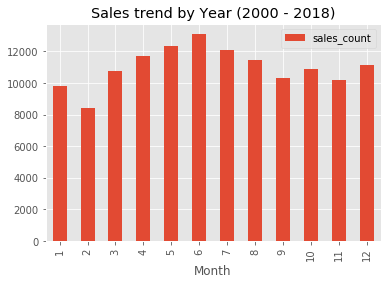

In [29]:
py_dc_data3 = sales_for_each_month.toPandas()
py_dc_data3.head()
df3 = py_dc_data3.set_index('Month')
df3[["sales_count"]].plot.bar()
plt.title('Sales trend by Year (2000 - 2018)')

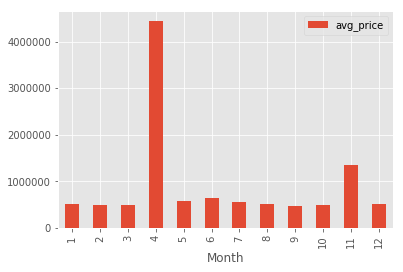

In [30]:
df3[["avg_price"]].plot.bar()

Looks like the avg_price in April is a outlier here!

#### Average sales price per ward

In [31]:
sales_each_ward = df.groupBy(F.col("WARD"))\
                        .agg(F.avg("PRICE").alias("avg_price"))\
                        .where(F.col("WARD") != 'null')\
                        .orderBy(F.desc("avg_price"))
sales_each_ward.show()

+------+------------------+
|  WARD|         avg_price|
+------+------------------+
|Ward 3|3077715.8967103427|
|Ward 2|1098570.4294727354|
|Ward 1| 573836.3117143086|
|Ward 6| 526868.4370657321|
|Ward 4| 489922.4055384102|
|Ward 5|395243.22666005127|
|Ward 8| 271522.4439133206|
|Ward 7|233922.17604336044|
+------+------------------+



In [32]:
py_dc_data2 = sales_each_ward.toPandas()
py_dc_data2.head()

,WARD,avg_price
0,Ward 3,3.077716e+06
1,Ward 2,1.098570e+06
2,Ward 1,5.738363e+05
3,Ward 6,5.268684e+05
4,Ward 4,4.899224e+05


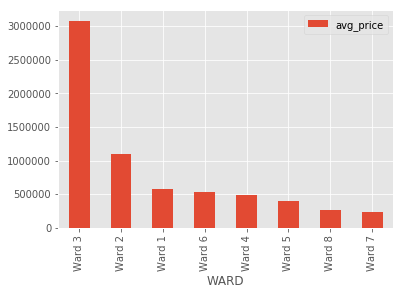

In [33]:
df2 = py_dc_data2.set_index('WARD')
df2[["avg_price"]].plot.bar()

Ward 3 has most avg_price in D.C.

## Sampling & Scatterplot
sample 0.2% of the data to plot a scatterplot:

In [44]:
df_sample = df.sample(withReplacement = False, fraction = 0.02, seed = 8)

# Convert to Pandas
py_df_sample = df_sample.toPandas()

py_df_sample.head()

,ID,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANTå
0,359,2,0,Warm Cool,Y,1.0,6,4,1890.0,NaN,...,-77.037670,Old City 2,040 D Old City 2,5301.0,005301 1002,Ward 2,0178,-77.037670,38.913217,NW
1,83684,1,0,Warm Cool,Y,1.0,6,2,1940.0,NaN,...,-76.955480,Lily Ponds,032 B Lily Ponds,9604.0,009604 2002,Ward 7,5018,-76.956125,38.894172,NE
2,89409,3,1,Forced Air,Y,1.0,6,3,2011.0,NaN,...,-76.927263,Marshall Heights,033 A Marshall Heights,9905.0,009905 1006,Ward 7,5310,-76.927018,38.885798,SE
3,155389,2,0,Forced Air,Y,NaN,4,2,2007.0,NaN,...,-77.017776,Old City 2,040 B Old City 2,4701.0,None,Ward 6,0515,-77.017778,38.903148,NW
4,125576,2,0,Forced Air,Y,NaN,4,2,1948.0,NaN,...,-77.069016,Wakefield,None,1200.0,None,Ward 3,1977,-77.069018,38.950168,NW


Draw plot on housing sales count by location

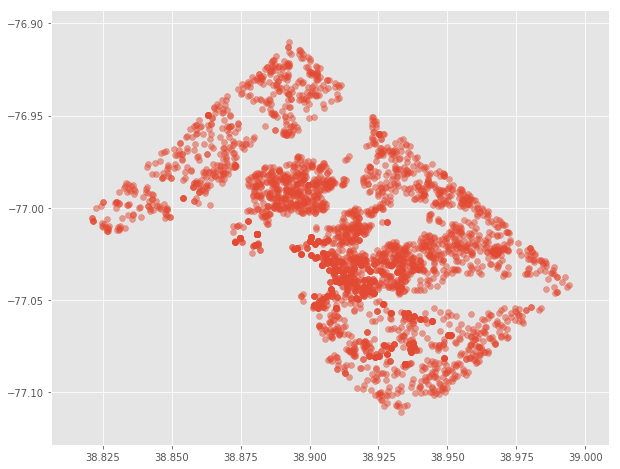

In [45]:
plt.figure(figsize=(10,8))
plt.scatter(py_df_sample['LATITUDE'], py_df_sample['LONGITUDE'], alpha=0.5)

Compare with Washington D.C Map

<img src="https://raw.githubusercontent.com/elieric/is843/master/DC-Ward-Public-Trans.jpg" width="300" align="left"/>